# CS5228-5228 Final Project

## Importing Libraries

In [2]:
# importing necessary libraries

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


## Exploratory Data Analysis and Data Pre-Processing

### Loading Data and Analysis

In [3]:
# Loading training and testing data path

train_data_file_path = 'train.csv'
test_data_file_path = 'test.csv'

train_data = pd.read_csv(train_data_file_path)
test_data = pd.read_csv(test_data_file_path)

In [4]:
# Columns in the data 
print(train_data.columns)

Index(['listing_id', 'title', 'make', 'model', 'description', 'manufactured',
       'original_reg_date', 'reg_date', 'type_of_vehicle', 'category',
       'transmission', 'curb_weight', 'power', 'fuel_type', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'opc_scheme', 'lifespan', 'eco_category',
       'features', 'accessories', 'indicative_price', 'price'],
      dtype='object')


In [5]:
train_data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,96000.0,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,85680.0,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,138000.0,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,160000.0,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,183000.0,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


In [6]:
# Create a new DataFrame 'train_data_2' by dropping the 'listing_id' column from 'train_data'
train_data_2 = train_data.drop(columns=['listing_id'])

# Identify duplicate rows in 'train_data_2' and store them in the 'duplicates' DataFrame
duplicates = train_data_2[train_data_2.duplicated()]

# Print the number of duplicate rows found
print(f"No. of duplicates: {len(duplicates)}")

# Print the indices of the duplicate rows
print("Duplicates index:", list(duplicates.index))

# Drop the duplicate rows from the original 'train_data' DataFrame using the indices of duplicates
train_data = train_data.drop(list(duplicates.index))

# Reset the index of 'train_data' after dropping duplicates, dropping the old index
train_data = train_data.reset_index(drop=True)

# Print the number of rows remaining in 'train_data' after dropping duplicates
print("Duplicates dropped, no. of rows: ", len(train_data))

No. of duplicates: 1
Duplicates index: [18966]
Duplicates dropped, no. of rows:  24999


In [7]:
train_data.columns

Index(['listing_id', 'title', 'make', 'model', 'description', 'manufactured',
       'original_reg_date', 'reg_date', 'type_of_vehicle', 'category',
       'transmission', 'curb_weight', 'power', 'fuel_type', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'opc_scheme', 'lifespan', 'eco_category',
       'features', 'accessories', 'indicative_price', 'price'],
      dtype='object')

### Steps to take for each column:

- Drop 'listing_id'
- Drop 'title'
- 'make' has 96 unique values,  do target encoding.
- 'model' has 799 unique values, do target encoding.
- 'description': Drop
- 'manufactured': Keep- Convert to age of vehicle
- 'original_reg_date' na in majority, to drop
- 'reg_date' : 'str' to 'pd datetime object'
- 'type_of_vehicle' : 11 unique values, target encoding
- 'category': Comma separated string, to format and then do one hot encoding
- 'transmission' : 2 values only, binary encoding
- 'curb_weight': Nothing to do for now
- 'power':  Nothing to do for now
- 'fuel_type': Majority of the rows are na, to drop colum
- 'engine_cap': Nothing to do for now
- 'no_of_owners': Nothing to do for now
- 'depreciation': Nothing to do for now
- 'coe': Nothing to do for now
- 'road_tax': Nothing to do for now
- 'dereg_value': Nothing to do for now
- 'mileage': Nothing to do for now 
- 'omv': Nothing to do for now 
- 'arf': Nothing to do for now 
- 'opc_scheme': Most values are NA, can be dropped
- 'lifespan': Most values are NA, can be dropped
- 'eco_category': only 'uncategorized', can be dropped
- 'features': Maybe Drop Column
- 'accessories': Maybe Drop Column
- 'indicative_price':All Na, drop column


### Preprocessing Data

In [8]:
columns_to_drop = ['listing_id', 'title', 'description',
                   'original_reg_date', 'fuel_type','opc_scheme',
                   'lifespan','eco_category','features','accessories',
                   'indicative_price'                   ]

In [9]:
# dropping columns

train_data = train_data.drop(columns_to_drop, axis=1)

In [10]:
# checking remaining columns

train_data.columns

Index(['make', 'model', 'manufactured', 'reg_date', 'type_of_vehicle',
       'category', 'transmission', 'curb_weight', 'power', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'price'],
      dtype='object')

In [11]:
# target encoding
def target_encode(col, keep=False):
    # Declare 'train_data' as a global variable to access and modify it inside the function
    global train_data  
    
    # Calculate the mean price for each unique value in the specified column 'col'
    col_avg_price = train_data.groupby(col)['price'].mean()
    
    # Map the average price back to the original DataFrame, creating a new column with encoded values
    train_data[f'{col}_encoded'] = train_data[col].map(col_avg_price)
    
    # If 'keep' is False, drop the original column 'col' from the DataFrame
    if not keep:
        train_data = train_data.drop([col], axis=1)

In [12]:
# Perform target encoding on the 'make' column and drop the original column after encoding
target_encode('make', keep=False)

# Perform target encoding on the 'model' column but keep the original column in the DataFrame
target_encode('model', keep=True)

# Perform target encoding on the 'type_of_vehicle' column and drop the original column after encoding
target_encode('type_of_vehicle', keep=False)

In [13]:
# Convert 'reg_date' to datetime
train_data['reg_date'] = pd.to_datetime(train_data['reg_date'], errors='coerce')

/var/folders/rh/l_ty2sb11m5bljbbs4kxnzfh0000gn/T/ipykernel_55804/468817164.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['reg_date'] = pd.to_datetime(train_data['reg_date'], errors='coerce')


In [13]:
# Binary encoding for 'transmission'
train_data['transmission'] = train_data['transmission'].map({'auto': 1, 'manual': 0})

In [14]:
# Initialize an empty list to store individual categories
l = []

# Iterate over each entry in the 'category' column of the train_data DataFrame
for i in train_data['category']:
    # Split the string of categories by commas and iterate over each category
    for j in i.split(','):
        # Remove any leading or trailing whitespace from the category and add it to the list
        l.append(j.strip())

# Create a list of unique categories by converting the list 'l' to a set and then back to a list
unique_categories = list(set(l))

# Print the list of unique categories
print("Unique Categories: \n")
for i in unique_categories:
    print(i)

Unique Categories: 

-
vintage cars
rare & exotic
electric cars
almost new car
opc car
parf car
coe car
low mileage car
consignment car
hybrid cars
premium ad car
imported used vehicle
direct owner sale
sta evaluated car
sgcarmart warranty cars


In [15]:
# encoding "category"

def encode_category(row, category):
    categories = [i.strip() for i in row.split(',')]
    if category in categories:
        return 1
    return 0

# Apply binary encoding for each unique category and create new columns

for category in unique_categories:
    train_data[f'category_{category}'] = train_data['category'].apply(lambda x: encode_category(x, category))
train_data.drop('category', axis=1, inplace=True)


In [16]:
# columns after basic EDA

train_data.columns

Index(['model', 'manufactured', 'reg_date', 'transmission', 'curb_weight',
       'power', 'engine_cap', 'no_of_owners', 'depreciation', 'coe',
       'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'price',
       'make_encoded', 'model_encoded', 'type_of_vehicle_encoded',
       'category_-', 'category_vintage cars', 'category_rare & exotic',
       'category_electric cars', 'category_almost new car', 'category_opc car',
       'category_parf car', 'category_coe car', 'category_low mileage car',
       'category_consignment car', 'category_hybrid cars',
       'category_premium ad car', 'category_imported used vehicle',
       'category_direct owner sale', 'category_sta evaluated car',
       'category_sgcarmart warranty cars'],
      dtype='object')

In [17]:
# looking at the data

train_data

,model,manufactured,reg_date,transmission,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,...,category_parf car,category_coe car,category_low mileage car,category_consignment car,category_hybrid cars,category_premium ad car,category_imported used vehicle,category_direct owner sale,category_sta evaluated car,category_sgcarmart warranty cars
0,range,2018.0,2018-03-08,auto,1884.0,280.0,2995.0,2.0,34270.0,48011,...,1,0,0,0,0,0,0,0,0,0
1,c200,2017.0,2017-12-28,auto,1465.0,135.0,1991.0,2.0,21170.0,47002,...,1,0,0,0,0,1,0,0,0,0
2,odyssey,2007.0,2007-09-19,auto,1648.0,118.0,2354.0,3.0,12520.0,50355,...,0,1,1,0,0,1,0,0,0,0
3,altis,2008.0,2008-12-15,auto,1195.0,80.0,1598.0,3.0,10140.0,27571,...,0,1,0,0,0,1,0,0,0,0
4,gs,2006.0,2006-12-22,auto,1660.0,183.0,2995.0,6.0,13690.0,48479,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,c180,2011.0,2011-07-14,auto,1500.0,115.0,1597.0,2.0,12440.0,45272,...,0,1,1,0,0,1,0,0,0,0
24995,bentayga,2018.0,2020-04-29,auto,2470.0,404.0,3996.0,1.0,NaN,37500,...,1,0,0,0,0,0,0,1,0,0
24996,a180,2014.0,2015-04-01,auto,1395.0,90.0,1595.0,2.0,21290.0,61410,...,1,0,1,0,0,1,0,0,0,1
24997,a3,2017.0,2017-06-30,auto,1275.0,85.0,999.0,2.0,15010.0,46489,...,1,0,0,0,0,0,0,0,0,0


In [18]:
train_data.columns

Index(['model', 'manufactured', 'reg_date', 'transmission', 'curb_weight',
       'power', 'engine_cap', 'no_of_owners', 'depreciation', 'coe',
       'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'price',
       'make_encoded', 'model_encoded', 'type_of_vehicle_encoded',
       'category_-', 'category_vintage cars', 'category_rare & exotic',
       'category_electric cars', 'category_almost new car', 'category_opc car',
       'category_parf car', 'category_coe car', 'category_low mileage car',
       'category_consignment car', 'category_hybrid cars',
       'category_premium ad car', 'category_imported used vehicle',
       'category_direct owner sale', 'category_sta evaluated car',
       'category_sgcarmart warranty cars'],
      dtype='object')

In [19]:
numerical_columns = ['manufactured', 'make_encoded','model_encoded','type_of_vehicle_encoded', 'curb_weight', 'power', 'engine_cap', 
                     'depreciation', 'coe', 'road_tax','dereg_value', 'mileage',
                     'omv', 'arf', 'price']

In [20]:
train_data_numerical = train_data[numerical_columns]

In [21]:
train_data_numerical

,manufactured,make_encoded,model_encoded,type_of_vehicle_encoded,curb_weight,power,engine_cap,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,price
0,2018.0,175768.386047,193126.796610,125993.515495,1884.0,280.0,2995.0,34270.0,48011,2380.0,103323.0,96000.0,88906.0,132031.0,193788.0
1,2017.0,136321.950315,79307.859813,124481.514504,1465.0,135.0,1991.0,21170.0,47002,1202.0,45179.0,85680.0,40678.0,43950.0,96800.0
2,2007.0,72210.909939,53242.976744,96845.085427,1648.0,118.0,2354.0,12520.0,50355,2442.0,16003.0,138000.0,27994.0,30794.0,39800.0
3,2008.0,91051.404127,54300.853061,57448.172748,1195.0,80.0,1598.0,10140.0,27571,1113.0,12184.0,160000.0,16084.0,16084.0,44800.0
4,2006.0,110039.423445,73852.228571,124481.514504,1660.0,183.0,2995.0,13690.0,48479,3570.0,9138.0,183000.0,50414.0,55456.0,25800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,2011.0,136321.950315,88679.249412,124481.514504,1500.0,115.0,1597.0,12440.0,45272,1039.0,30921.0,94000.0,31019.0,31019.0,85000.0
24995,2018.0,456889.668919,686725.684211,125993.515495,2470.0,404.0,3996.0,NaN,37500,3944.0,NaN,73838.0,137136.0,218845.0,412888.0
24996,2014.0,136321.950315,78981.313433,66757.875139,1395.0,90.0,1595.0,21290.0,61410,740.0,11890.0,88388.0,22897.0,14056.0,23888.0
24997,2017.0,116238.671769,72220.412766,66757.875139,1275.0,85.0,999.0,15010.0,46489,392.0,24070.0,94900.0,23772.0,15281.0,53300.0


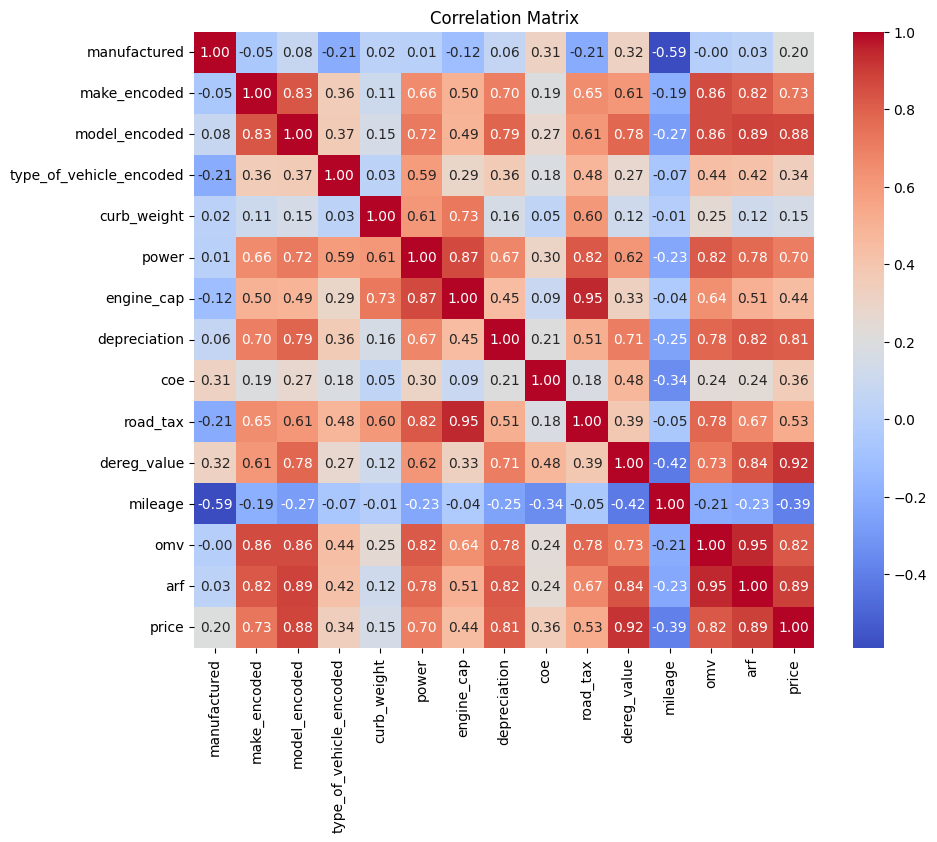

In [22]:
correlation_matrix = train_data_numerical.corr()

# Optionally, visualize the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [23]:
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlations
correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]

# Sort pairs to remove duplicates like (A, B) and (B, A)
correlation_pairs['Ordered Pair'] = correlation_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)

# Drop duplicates and reset the index
correlation_pairs = correlation_pairs.drop_duplicates(subset='Ordered Pair').drop(columns='Ordered Pair').reset_index(drop=True)

correlation_pairs

,Variable 1,Variable 2,Correlation
0,manufactured,make_encoded,-0.051235
1,manufactured,model_encoded,0.080322
2,manufactured,type_of_vehicle_encoded,-0.207963
3,manufactured,curb_weight,0.020994
4,manufactured,power,0.009875
...,...,...,...
100,mileage,arf,-0.228244
101,mileage,price,-0.392544
102,omv,arf,0.946252
103,omv,price,0.822113


In [24]:
# correlation coefficients of the 'price' variable with all other variables present in correlation_matrix

correlation_matrix['price']

manufactured               0.202966
make_encoded               0.731092
model_encoded              0.877143
type_of_vehicle_encoded    0.336770
curb_weight                0.152134
power                      0.703502
engine_cap                 0.443114
depreciation               0.811813
coe                        0.356524
road_tax                   0.527719
dereg_value                0.919634
mileage                   -0.392544
omv                        0.822113
arf                        0.891887
price                      1.000000
Name: price, dtype: float64

In [25]:
# Create a DataFrame 'high_corr_pairs' containing correlation values
# that are greater than or equal to 0.75, excluding perfect correlations (1.0)
high_corr_pairs = correlation_matrix[(correlation_matrix >= 0.75) & (correlation_matrix != 1.0)]

# Iterate over each column in the 'high_corr_pairs' DataFrame
for col in high_corr_pairs:
    # Iterate over each index in the 'high_corr_pairs' DataFrame
    for ind in high_corr_pairs:
        # Check if the correlation value between the column and index is positive
        if high_corr_pairs[col][ind] > 0:
            # Uncomment the line below to print '1' for each positive correlation found
            # print(1)
            # Print the names of the two correlated columns and their correlation value
            print(f"{col} - {ind}: {high_corr_pairs[col][ind]}")

make_encoded - model_encoded: 0.8287825056856839
make_encoded - omv: 0.8584255924537275
make_encoded - arf: 0.8234850078772148
model_encoded - make_encoded: 0.8287825056856839
model_encoded - depreciation: 0.7874435140706186
model_encoded - dereg_value: 0.7811946895476418
model_encoded - omv: 0.8621468973141826
model_encoded - arf: 0.8863059325814613
model_encoded - price: 0.8771429270006129
power - engine_cap: 0.8660062967240877
power - road_tax: 0.8229464794564307
power - omv: 0.8191435454220293
power - arf: 0.776216184034225
engine_cap - power: 0.8660062967240877
engine_cap - road_tax: 0.9467890249384937
depreciation - model_encoded: 0.7874435140706186
depreciation - omv: 0.7766457864364514
depreciation - arf: 0.8232592884377613
depreciation - price: 0.8118127024124244
road_tax - power: 0.8229464794564307
road_tax - engine_cap: 0.9467890249384937
road_tax - omv: 0.7764468238792027
dereg_value - model_encoded: 0.7811946895476418
dereg_value - arf: 0.8373817559906181
dereg_value - pri

In [26]:
# low correlation columns 

columns_to_drop_due_to_corr = [
'arf',
'omv',
'make_encoded',
'engine_cap',
'road_tax',
'curb_weight',
'coe',
# 'manufactured'
]

In [27]:
train_data = train_data.drop(columns_to_drop_due_to_corr, axis=1)

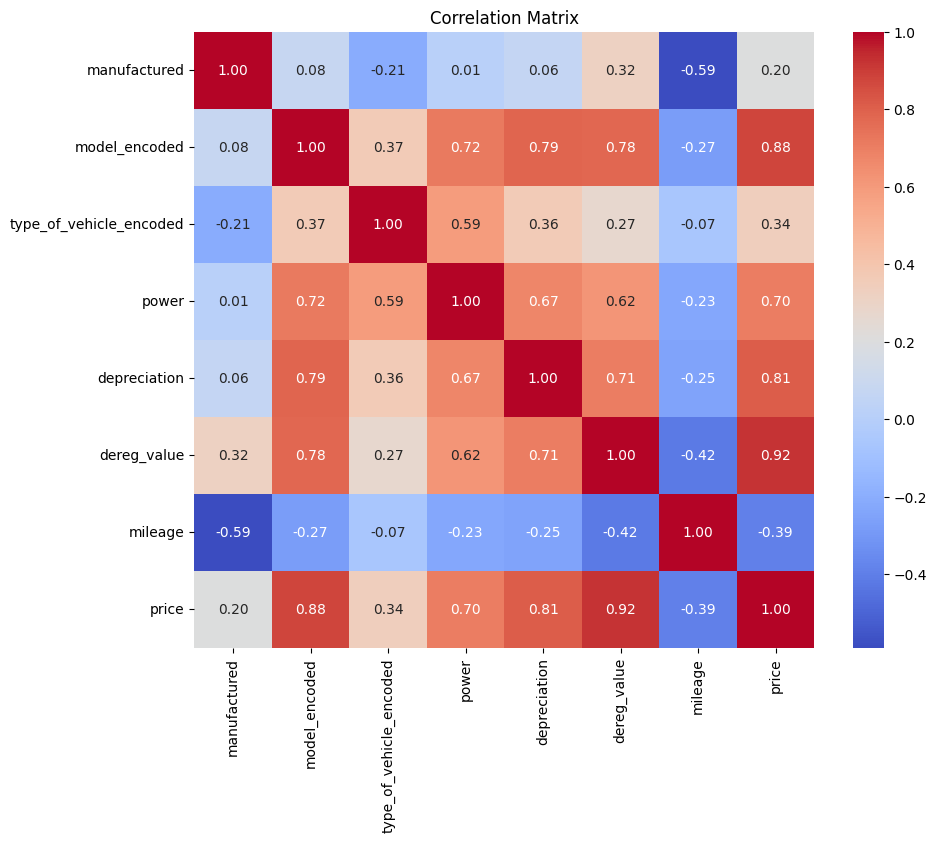

In [28]:
# plotting new heatmap after removing unnecessary columns 

numerical_columns = [i for i in numerical_columns if i not in columns_to_drop_due_to_corr] 
train_data_numerical = train_data[numerical_columns]
correlation_matrix = train_data_numerical.corr()

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [29]:
train_data

,model,manufactured,reg_date,transmission,power,no_of_owners,depreciation,dereg_value,mileage,price,...,category_parf car,category_coe car,category_low mileage car,category_consignment car,category_hybrid cars,category_premium ad car,category_imported used vehicle,category_direct owner sale,category_sta evaluated car,category_sgcarmart warranty cars
0,range,2018.0,2018-03-08,auto,280.0,2.0,34270.0,103323.0,96000.0,193788.0,...,1,0,0,0,0,0,0,0,0,0
1,c200,2017.0,2017-12-28,auto,135.0,2.0,21170.0,45179.0,85680.0,96800.0,...,1,0,0,0,0,1,0,0,0,0
2,odyssey,2007.0,2007-09-19,auto,118.0,3.0,12520.0,16003.0,138000.0,39800.0,...,0,1,1,0,0,1,0,0,0,0
3,altis,2008.0,2008-12-15,auto,80.0,3.0,10140.0,12184.0,160000.0,44800.0,...,0,1,0,0,0,1,0,0,0,0
4,gs,2006.0,2006-12-22,auto,183.0,6.0,13690.0,9138.0,183000.0,25800.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,c180,2011.0,2011-07-14,auto,115.0,2.0,12440.0,30921.0,94000.0,85000.0,...,0,1,1,0,0,1,0,0,0,0
24995,bentayga,2018.0,2020-04-29,auto,404.0,1.0,NaN,NaN,73838.0,412888.0,...,1,0,0,0,0,0,0,1,0,0
24996,a180,2014.0,2015-04-01,auto,90.0,2.0,21290.0,11890.0,88388.0,23888.0,...,1,0,1,0,0,1,0,0,0,1
24997,a3,2017.0,2017-06-30,auto,85.0,2.0,15010.0,24070.0,94900.0,53300.0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
# Calculate the sum of missing (NaN) values in each column of the DataFrame 'train_data'
s = train_data.isna().sum()

# Filter and display only the columns that have missing values (where the count is not zero)
s[s != 0]

manufactured       7
power           2640
no_of_owners      18
depreciation     507
dereg_value      220
mileage         5304
dtype: int64

In [31]:
columns_to_replace = ['depreciation', 'dereg_value', 'mileage', 'power', 'no_of_owners', 'manufactured']

# Replace NaN values in each column with the mean of the column for the same 'type_of_vehicle'

for col in columns_to_replace:
    train_data[col] = train_data.groupby('model')[col].transform(lambda x: x.fillna(x.mean()))

In [32]:
train_data = train_data.drop(columns=['model'])

In [35]:
s = train_data.isna().sum()
s[s!=0]

Series([], dtype: int64)

In [36]:
train_data['power'] = train_data['power'].fillna(train_data['power'].mean())
train_data['depreciation'] = train_data['depreciation'].fillna(train_data['depreciation'].mean())
train_data['dereg_value'] = train_data['dereg_value'].fillna(train_data['dereg_value'].mean())
train_data['mileage'] = train_data['mileage'].fillna(train_data['mileage'].mean())
train_data['no_of_owners'] = train_data['no_of_owners'].fillna(train_data['no_of_owners'].median())


In [37]:
s = train_data.isna().sum()
s[s!=0]

Series([], dtype: int64)

In [38]:
train_data.columns

Index(['manufactured', 'reg_date', 'transmission', 'power', 'no_of_owners',
       'depreciation', 'dereg_value', 'mileage', 'price', 'model_encoded',
       'type_of_vehicle_encoded', 'category_-', 'category_vintage cars',
       'category_rare & exotic', 'category_electric cars',
       'category_almost new car', 'category_opc car', 'category_parf car',
       'category_coe car', 'category_low mileage car',
       'category_consignment car', 'category_hybrid cars',
       'category_premium ad car', 'category_imported used vehicle',
       'category_direct owner sale', 'category_sta evaluated car',
       'category_sgcarmart warranty cars'],
      dtype='object')

In [39]:
# Convert 'reg_date' to datetime if not already in datetime format
train_data['manufactured'] = pd.to_datetime(train_data['manufactured'], errors='coerce')

# Get the current date
current_date = datetime.now()

# Calculate the age of the vehicle in months
train_data['vehicle_age_months'] = (current_date.year - train_data['manufactured'].dt.year) * 12 + (current_date.month - train_data['manufactured'].dt.month)

train_data = train_data.drop(columns=['manufactured','reg_date'])

In [40]:
train_data

,transmission,power,no_of_owners,depreciation,dereg_value,mileage,price,model_encoded,type_of_vehicle_encoded,category_-,...,category_coe car,category_low mileage car,category_consignment car,category_hybrid cars,category_premium ad car,category_imported used vehicle,category_direct owner sale,category_sta evaluated car,category_sgcarmart warranty cars,vehicle_age_months
0,auto,280.0,2.0,34270.0,103323.000000,96000.0,193788.0,193126.796610,125993.515495,0,...,0,0,0,0,0,0,0,0,0,658
1,auto,135.0,2.0,21170.0,45179.000000,85680.0,96800.0,79307.859813,124481.514504,0,...,0,0,0,0,1,0,0,0,0,658
2,auto,118.0,3.0,12520.0,16003.000000,138000.0,39800.0,53242.976744,96845.085427,0,...,1,1,0,0,1,0,0,0,0,658
3,auto,80.0,3.0,10140.0,12184.000000,160000.0,44800.0,54300.853061,57448.172748,0,...,1,0,0,0,1,0,0,0,0,658
4,auto,183.0,6.0,13690.0,9138.000000,183000.0,25800.0,73852.228571,124481.514504,0,...,1,0,0,0,1,0,0,0,0,658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,auto,115.0,2.0,12440.0,30921.000000,94000.0,85000.0,88679.249412,124481.514504,0,...,1,1,0,0,1,0,0,0,0,658
24995,auto,404.0,1.0,87558.0,319257.666667,73838.0,412888.0,686725.684211,125993.515495,0,...,0,0,0,0,0,0,1,0,0,658
24996,auto,90.0,2.0,21290.0,11890.000000,88388.0,23888.0,78981.313433,66757.875139,0,...,0,1,0,0,1,0,0,0,1,658
24997,auto,85.0,2.0,15010.0,24070.000000,94900.0,53300.0,72220.412766,66757.875139,0,...,0,0,0,0,0,0,0,0,0,658


In [41]:
# creating dependent and independent variables 

X = train_data.drop(columns=['price'])
y = train_data['price']

#### Data Pre-processing Done

## Combined Final Preprocessing and Testing


In [42]:
train_data = pd.read_csv(train_data_file_path)
test_data = pd.read_csv(test_data_file_path)


In [43]:
def process_data(data):
    # Remove duplicates
    data_2 = data.drop(columns=['listing_id'])
    duplicates = data_2[data_2.duplicated()]
    print(f"No. of duplicates: {len(duplicates)}")
    print("Duplicates index:", list(duplicates.index))
    data = data.drop(list(duplicates.index))
    data = data.reset_index(drop=True)
    print("Duplicates dropped, no. of rows: ", len(data))
    
    # Drop unnecessary columns that won't be used for modeling
    columns_to_drop = ['listing_id', 'title', 'description',
                   'original_reg_date', 'fuel_type','opc_scheme',
                   'lifespan','eco_category','features','accessories',
                   'indicative_price',
                   'manufactured'
                   ]
    data = data.drop(columns_to_drop, axis=1)

    # Target encoding function: Replaces categorical values with mean target value
    def target_encode(data, col, keep=False):
        col_avg_price = data.groupby(col)['dereg_value'].mean()
        data[f'{col}_encoded'] = data[col].map(col_avg_price)
        if not keep:
            data = data.drop([col], axis=1)
        return data

    # Apply target encoding to make, model and vehicle type
    data = target_encode(data,'make', keep=False)
    data = target_encode(data,'model', keep=True)  # Keep original model column for later use
    data = target_encode(data,'type_of_vehicle', keep=False)

    # Convert dates and encode transmission
    data['reg_date'] = pd.to_datetime(data['reg_date'], errors='coerce')
    data['transmission'] = data['transmission'].map({'auto': 1, 'manual': 0})
    
    # One-hot encode vehicle categories
    l = []
    for i in data['category']:
        for j in i.split(','):
            l.append(j.strip())
    unique_categories = list(set(l))

    def encode_category(row, category):
        categories = [i.strip() for i in row.split(',')]
        if category in categories:
            return 1
        return 0

    # Create binary columns for each category
    for category in unique_categories:
        data[f'category_{category}'] = data['category'].apply(lambda x: encode_category(x, category))
    data.drop('category', axis=1, inplace=True)

    # Drop highly correlated features to reduce multicollinearity
    columns_to_drop_due_to_corr = [
    'make_encoded',
    'power',
    'omv',
    'engine_cap',
    'arf',
    'curb_weight',
    'coe',
    'type_of_vehicle_encoded'
    ]
    data = data.drop(columns_to_drop_due_to_corr, axis=1)

    # Handle missing values by model group
    columns_to_replace = ['depreciation', 'dereg_value', 'mileage', 'road_tax', 'model_encoded']
    for col in columns_to_replace:
        data[col] = data.groupby('model')[col].transform(lambda x: x.fillna(x.mean()))

    # Drop model column after using it for grouping
    data = data.drop(columns=['model'])
    
    # Fill remaining missing values with mean/median
    data['road_tax'] = data['road_tax'].fillna(data['road_tax'].mean())
    data['depreciation'] = data['depreciation'].fillna(data['depreciation'].mean())
    data['dereg_value'] = data['dereg_value'].fillna(data['dereg_value'].mean())
    data['mileage'] = data['mileage'].fillna(data['mileage'].mean())
    data['model_encoded'] = data['model_encoded'].fillna(data['model_encoded'].mean())
    data['no_of_owners'] = data['no_of_owners'].fillna(data['no_of_owners'].median())

    # Calculate vehicle age in months
    current_date = datetime.now()
    data['vehicle_age_months'] = (current_date.year - data['reg_date'].dt.year) * 12 + \
                                      (current_date.month - data['reg_date'].dt.month)

    # Drop registration date after extracting age information
    data = data.drop(columns=['reg_date'])
    return data

In [44]:
train_output = process_data(train_data)
train_output.head()

No. of duplicates: 1
Duplicates index: [18966]
Duplicates dropped, no. of rows:  24999


/var/folders/rh/l_ty2sb11m5bljbbs4kxnzfh0000gn/T/ipykernel_55804/781467128.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['reg_date'] = pd.to_datetime(data['reg_date'], errors='coerce')


,transmission,no_of_owners,depreciation,road_tax,dereg_value,mileage,price,model_encoded,category_-,category_vintage cars,...,category_coe car,category_low mileage car,category_consignment car,category_hybrid cars,category_premium ad car,category_imported used vehicle,category_direct owner sale,category_sta evaluated car,category_sgcarmart warranty cars,vehicle_age_months
0,1,2.0,34270.0,2380.0,103323.0,96000.0,193788.0,94730.760684,0,0,...,0,0,0,0,0,0,0,0,0,80
1,1,2.0,21170.0,1202.0,45179.0,85680.0,96800.0,36268.757009,0,0,...,0,0,0,0,1,0,0,0,0,83
2,1,3.0,12520.0,2442.0,16003.0,138000.0,39800.0,18997.952381,0,0,...,1,1,0,0,1,0,0,0,0,206
3,1,3.0,10140.0,1113.0,12184.0,160000.0,44800.0,24129.467213,0,0,...,1,0,0,0,1,0,0,0,0,191
4,1,6.0,13690.0,3570.0,9138.0,183000.0,25800.0,35360.285714,0,0,...,1,0,0,0,1,0,0,0,0,215


In [45]:
test_output = process_data(test_data)
test_output.head()

No. of duplicates: 0
Duplicates index: []
Duplicates dropped, no. of rows:  10000


/var/folders/rh/l_ty2sb11m5bljbbs4kxnzfh0000gn/T/ipykernel_55804/781467128.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['reg_date'] = pd.to_datetime(data['reg_date'], errors='coerce')


,transmission,no_of_owners,depreciation,road_tax,dereg_value,mileage,model_encoded,category_-,category_vintage cars,category_rare & exotic,...,category_coe car,category_low mileage car,category_hybrid cars,category_consignment car,category_premium ad car,category_imported used vehicle,category_direct owner sale,category_sta evaluated car,category_sgcarmart warranty cars,vehicle_age_months
0,1,2.0,17660.0,682.0,9582.0,112000.0,26681.457399,0,0,0,...,0,0,0,0,0,0,0,0,0,115
1,1,1.0,10920.0,1113.0,13644.0,120000.0,25534.853403,0,0,0,...,1,1,0,0,1,0,0,0,0,205
2,1,1.0,22120.0,1210.0,54818.0,43000.0,35387.200000,0,0,0,...,0,0,0,0,0,0,0,0,0,56
3,1,3.0,13700.0,682.0,26363.0,53300.0,17431.125000,0,0,0,...,0,0,0,0,1,0,0,0,0,65
4,1,3.0,14190.0,682.0,15197.0,149000.0,25534.853403,0,0,0,...,0,0,0,0,1,0,0,0,0,108


In [46]:
X = train_output.drop(columns=['price'])
y = train_output['price']


In [47]:
# Importing Various Models to try 
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [48]:

# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:

# Initialize models with hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest (n=50)': RandomForestRegressor(n_estimators=50, random_state=42),
    'Random Forest (n=100)': RandomForestRegressor(n_estimators=100, random_state=42),
    'Random Forest (n=200)': RandomForestRegressor(n_estimators=200, random_state=42),
    'Random Forest (n=200)': RandomForestRegressor(n_estimators=300, random_state=42),
    'Gradient Boosting (depth=3)': GradientBoostingRegressor(max_depth=3, n_estimators=100, random_state=42),
    'Gradient Boosting (depth=5)': GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=42),
    'Gradient Boosting (depth=8)': GradientBoostingRegressor(max_depth=8, n_estimators=100, random_state=42),
    'Gradient Boosting (depth=12)': GradientBoostingRegressor(max_depth=12, n_estimators=100, random_state=42),
}

# Initialize K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop over the models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    train_rmse_scores = []
    val_rmse_scores = []
    
    # Perform K-Fold Cross Validation
    for train_index, val_index in kf.split(X_scaled):
        # Use .iloc to properly select rows based on positional index
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on training set and validation set
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Calculate RMSE for training and validation sets
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        
        # Append RMSE to list for later averaging
        train_rmse_scores.append(train_rmse)
        val_rmse_scores.append(val_rmse)
    
    # Calculate mean RMSE for training and validation
    mean_train_rmse = np.mean(train_rmse_scores)
    mean_val_rmse = np.mean(val_rmse_scores)
    
    # Output the results
    print(f"{model_name} Training RMSE: {mean_train_rmse:.2f}")
    print(f"{model_name} Validation RMSE: {mean_val_rmse:.2f}\n")


Evaluating Linear Regression...
Linear Regression Training RMSE: 45773.67
Linear Regression Validation RMSE: 45953.31

Evaluating Ridge Regression...
Ridge Regression Training RMSE: 45773.69
Ridge Regression Validation RMSE: 45953.08

Evaluating Lasso Regression...
Lasso Regression Training RMSE: 45773.67
Lasso Regression Validation RMSE: 45953.31

Evaluating Random Forest (n=50)...
Random Forest (n=50) Training RMSE: 10505.67
Random Forest (n=50) Validation RMSE: 26528.15

Evaluating Random Forest (n=100)...
Random Forest (n=100) Training RMSE: 10235.44
Random Forest (n=100) Validation RMSE: 26120.57

Evaluating Random Forest (n=200)...
Random Forest (n=200) Training RMSE: 9998.99
Random Forest (n=200) Validation RMSE: 26047.78

Evaluating Gradient Boosting (depth=3)...
Gradient Boosting (depth=3) Training RMSE: 20817.35
Gradient Boosting (depth=3) Validation RMSE: 28814.39

Evaluating Gradient Boosting (depth=5)...
Gradient Boosting (depth=5) Training RMSE: 10070.88
Gradient Boosting

#### Deciding to proceed with GBR Model with depth 5 based on low Training and Validation RMSE

In [50]:
# Initialize the Gradient Boosting Regressor with optimal hyperparameters
# - max_depth=5: Maximum depth of individual regression trees
# - n_estimators=100: Number of boosting stages/trees
# - random_state=42: Set seed for reproducibility
gbr_model = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=42)

# Prepare test and training data
X_test = test_output
X_train = X

# Sort columns alphabetically to ensure consistent feature order between train and test
X_test = X_test.reindex(sorted(X_test.columns), axis=1)
X_train = X_train.reindex(sorted(X_train.columns), axis=1)

# Convert target variable to numpy array for better compatibility
y_train = np.array(y)

In [51]:
# Initialize the StandardScaler for feature normalization
scaler = StandardScaler()

# Scale the training data
# fit_transform() computes mean and std, then transforms the training data
X_train = scaler.fit_transform(X_train)

# Scale the test data using transform() only
# This applies the scaling parameters learned from training data
X_test = scaler.transform(X_test)

# Train the Gradient Boosting model on the scaled training data
gbr_model.fit(X_train, y_train)

# Generate predictions for the test set
y_test_pred = gbr_model.predict(X_test)

# Print the predictions
print("Predictions on test set:")
print(y_test_pred)

Predictions on test set:
[ 13098.02231774  35493.24238445 147614.0872099  ...  75017.34541868
  84509.41171707  55671.47409736]


In [53]:
predictions_df = pd.DataFrame({
    'Id': range(len(y_test_pred)),
    'Predicted': y_test_pred
})
predictions_df.to_csv('predictions.csv', index=False)
predictions_df


,Id,Predicted
0,0,13098.022318
1,1,35493.242384
2,2,147614.087210
3,3,73602.655145
4,4,26878.863893
...,...,...
9995,9995,116757.192474
9996,9996,195687.672153
9997,9997,75017.345419
9998,9998,84509.411717


### Making Neccessary Plots


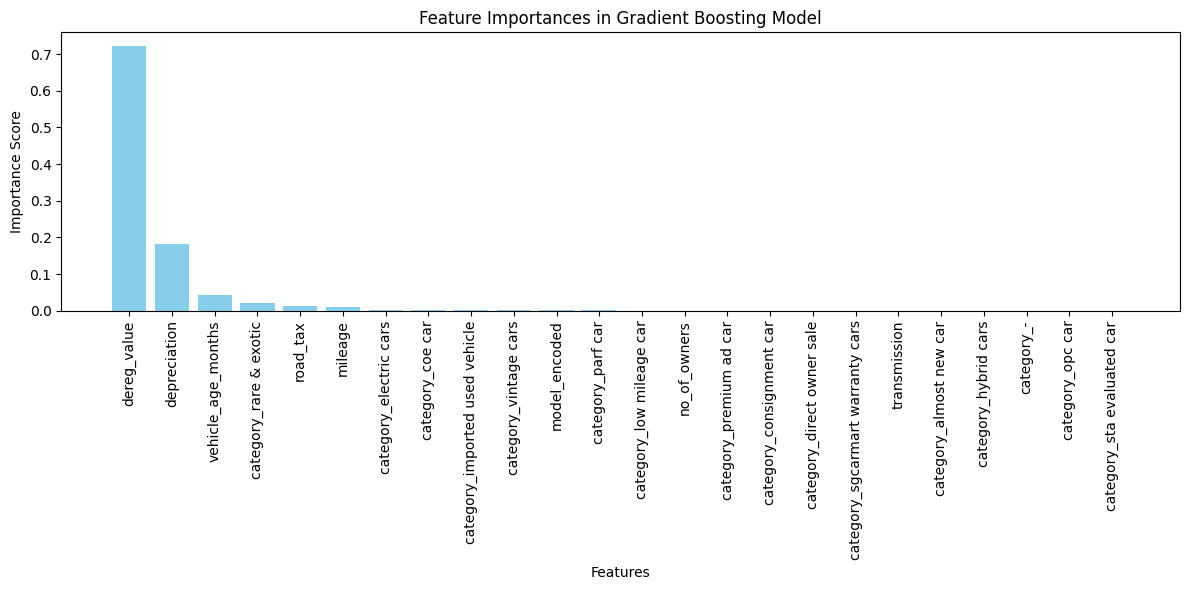

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'gbr_model' is the trained Gradient Boosting model and 'X' is the feature DataFrame
gbr_model = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=42)
gbr_model.fit(X, y)

feature_importances = gbr_model.feature_importances_
features = X.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Gradient Boosting Model")
plt.bar(range(len(features)), feature_importances[indices], color='skyblue', align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


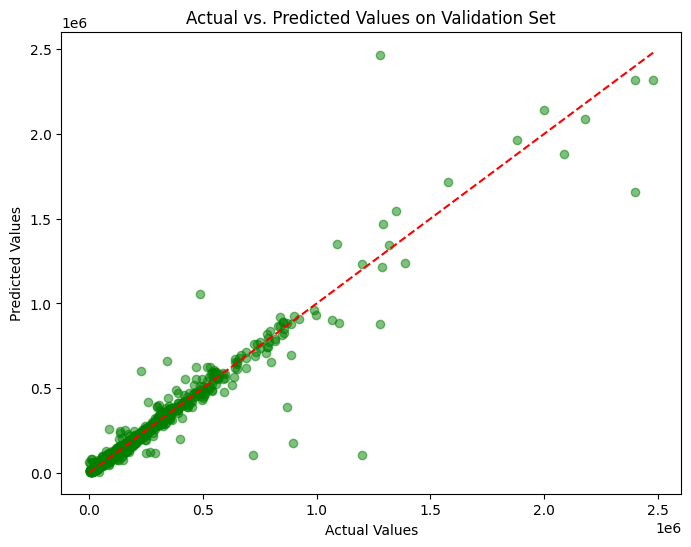

In [55]:
import matplotlib.pyplot as plt

# Make predictions on the validation set
from sklearn.model_selection import train_test_split

# Split data for visualization purposes
X_train_vis, X_val_vis, y_train_vis, y_val_vis = train_test_split(X, y, test_size=0.2, random_state=42)
gbr_model.fit(X_train_vis, y_train_vis)
y_val_pred = gbr_model.predict(X_val_vis)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val_vis, y_val_pred, alpha=0.5, color='green')
plt.plot([y_val_vis.min(), y_val_vis.max()], [y_val_vis.min(), y_val_vis.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values on Validation Set")
plt.show()


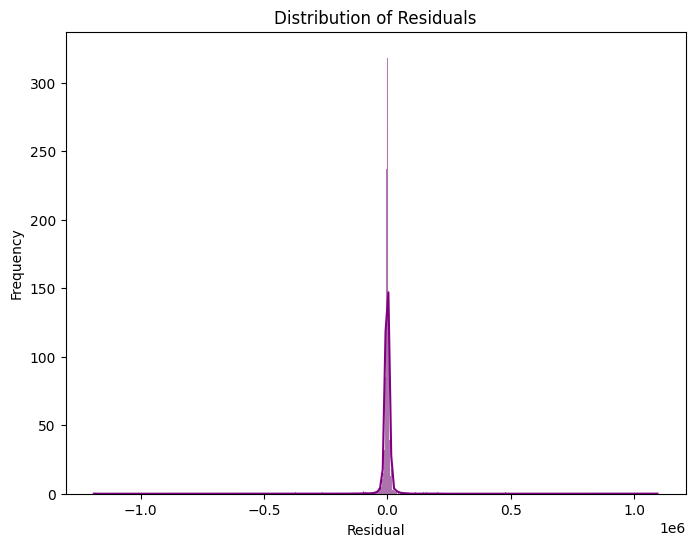

In [56]:
import seaborn as sns

# Calculate residuals
residuals = y_val_vis - y_val_pred

# Plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


## Inconclusive Exploratory Data Analysis

Other EDA and Pre-processing Experimentations done that did not help our accuracy or resulted in poorly correlated columns, hence not included in final.

In [57]:
train_data = pd.read_csv(train_data_file_path)
test_data = pd.read_csv(test_data_file_path)

### Manufactured and Registration Date

In [58]:
train_data[['manufactured', 'original_reg_date','reg_date']]

,manufactured,original_reg_date,reg_date
0,2018.0,NaN,08-mar-2018
1,2017.0,NaN,28-dec-2017
2,2007.0,NaN,19-sep-2007
3,2008.0,NaN,15-dec-2008
4,2006.0,NaN,22-dec-2006
...,...,...,...
24995,2011.0,NaN,14-jul-2011
24996,2018.0,23-aug-2018,29-apr-2020
24997,2014.0,NaN,01-apr-2015
24998,2017.0,NaN,30-jun-2017


The original_reg_date feature appears to have limited utility. The manufactured and reg_date features are nearly identical, differing by only 2–3 years at most. Additionally, manufactured has 7 null values, whereas reg_date has none. We will explore the possibility of filling the missing manufactured values with the corresponding year from reg_date where applicable.

In [59]:
# null values for manufactured
train_data[train_data["manufactured"].isnull()]

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
3388,1236749,BYD Atto 3 Electric,byd,atto,long term leasing and 100% loan available! tra...,NaN,NaN,28-sep-2023,suv,"parf car, almost new car, premium ad car, low ...",...,80.0,34000.0,NaN,NaN,NaN,uncategorized,knockdown rear seats. panaramic roof. driver a...,auto led headlight & daytime running light. mu...,NaN,162888.0
5822,1297535,Nissan Leaf Electric,nissan,leaf,18,NaN,NaN,21-mar-2024,hatchback,"parf car, almost new car, low mileage car, ele...",...,48.0,36829.0,3561.0,NaN,NaN,uncategorized,"powered by electric motor, battery capacity 40...","360 degrees camera, led headlights with drl, k...",NaN,149888.0
6641,1233783,BYD Atto 3 Electric,byd,atto,long term leasing and 100% loan available! tra...,NaN,NaN,14-sep-2023,suv,"parf car, almost new car, premium ad car, low ...",...,45.0,34000.0,NaN,NaN,NaN,uncategorized,knockdown rear seats. panaramic roof. driver a...,auto led headlight & daytime running light. mu...,NaN,162888.0
16683,1201635,Toyota Hiace 3.0M DX,toyota,hiace,we provide financing servicing for both bank o...,NaN,NaN,31-jan-2020,van,-,...,NaN,28138.0,1407.0,NaN,30-jan-2040,uncategorized,vehicle in tip top condition. view to believe....,"usb player, floor matt, reverse cam n sensor, ...",NaN,73800.0
22020,1239256,Toyota Alphard Hybrid 2.5A SR C-Package Moonroof,NaN,alphard,"5 years warranty, 5 times free servicing! read...",NaN,NaN,10-oct-2023,mpv,"parf car, rare & exotic, almost new car, premi...",...,8000.0,50982.0,68866.0,NaN,NaN,uncategorized,"dashcam front and rear, solar film tinting, ca...",NaN,NaN,303800.0
23034,1295665,Honda Vezel 1.5A G,honda,vezel,ready stock! comes with an android player with...,NaN,NaN,25-apr-2024,suv,"parf car, almost new car, low mileage car",...,80.0,19087.0,19087.0,NaN,NaN,uncategorized,view specs of the honda vezel,android player with apple carplay and android ...,NaN,149800.0
23666,1325548,BMW 3 Series 335i Coupe (COE till 05/2029),bmw,335i,NaN,NaN,23-jan-2007,19-jan-2010,sports car,"imported used vehicle, coe car",...,NaN,38033.0,38033.0,NaN,NaN,uncategorized,fully refurbished n54 3.0l twin turbo with ful...,NaN,NaN,73000.0


In [60]:
train_data["reg_date"] = pd.to_datetime(train_data["reg_date"], format="%d-%b-%Y")
# Extract the year from 'reg_date'
train_data["reg_year"] = train_data["reg_date"].dt.year

# Check if 'reg_year' matches 'manufactured', excluding rows where 'manufactured' is null
train_data["year_match"] = (train_data["reg_year"] == train_data["manufactured"]) & train_data["manufactured"].notnull()

# Display results
print(train_data[["reg_date", "manufactured", "reg_year", "year_match"]])
mismatched_years = train_data[train_data["year_match"] == False]

        reg_date  manufactured  reg_year  year_match
0     2018-03-08        2018.0      2018        True
1     2017-12-28        2017.0      2017        True
2     2007-09-19        2007.0      2007        True
3     2008-12-15        2008.0      2008        True
4     2006-12-22        2006.0      2006        True
...          ...           ...       ...         ...
24995 2011-07-14        2011.0      2011        True
24996 2020-04-29        2018.0      2020       False
24997 2015-04-01        2014.0      2015       False
24998 2017-06-30        2017.0      2017        True
24999 2016-12-07        2016.0      2016        True

[25000 rows x 4 columns]


In [61]:
# Display the mismatched rows
print(mismatched_years[["reg_date", "manufactured", "reg_year", "year_match"]])
matched_years = train_data[train_data["year_match"] == True]

        reg_date  manufactured  reg_year  year_match
7     2010-01-26        2009.0      2010       False
9     2009-03-05        2008.0      2009       False
10    2011-03-16        2010.0      2011       False
14    2017-01-11        2016.0      2017       False
19    2019-01-11        2018.0      2019       False
...          ...           ...       ...         ...
24987 2016-02-24        2015.0      2016       False
24991 2023-12-22        2022.0      2023       False
24992 2023-02-24        2022.0      2023       False
24996 2020-04-29        2018.0      2020       False
24997 2015-04-01        2014.0      2015       False

[9972 rows x 4 columns]


In [62]:

print(matched_years[["reg_date", "manufactured", "reg_year", "year_match"]])
# display the macthed rows

        reg_date  manufactured  reg_year  year_match
0     2018-03-08        2018.0      2018        True
1     2017-12-28        2017.0      2017        True
2     2007-09-19        2007.0      2007        True
3     2008-12-15        2008.0      2008        True
4     2006-12-22        2006.0      2006        True
...          ...           ...       ...         ...
24993 2019-05-10        2019.0      2019        True
24994 2019-06-24        2019.0      2019        True
24995 2011-07-14        2011.0      2011        True
24998 2017-06-30        2017.0      2017        True
24999 2016-12-07        2016.0      2016        True

[15028 rows x 4 columns]


The manufactured and reg_year fields match in 15,027 records and differ in 9,972 records, though the difference is typically only one or two years. Given this close alignment, we will impute missing values in manufactured using reg_year, as it represents the majority pattern.

In [63]:
train_data.drop(columns = ["year_match"], inplace = True)
train_data.drop(columns = ['original_reg_date'], inplace = True)
# Replace null values in 'manufactured' with corresponding 'reg_year' values
train_data["manufactured"].fillna(train_data["reg_year"], inplace=True)

/var/folders/rh/l_ty2sb11m5bljbbs4kxnzfh0000gn/T/ipykernel_55804/3622309097.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["manufactured"].fillna(train_data["reg_year"], inplace=True)


However this approach did not make much of a difference towards our model accuracy.

### Make and Model

In [64]:
train_data[['make', 'model']]

,make,model
0,land rover,range
1,mercedes-benz,c200
2,honda,odyssey
3,toyota,altis
4,lexus,gs
...,...,...
24995,mercedes-benz,c180
24996,bentley,bentayga
24997,mercedes-benz,a180
24998,audi,a3


There were two columns: 'make' and 'model'. The 'model' corresponds to the car model for the given 'make'. While some records have a null value in the 'make' column, there are no records with a null value in the 'model' column. Since each 'make' is associated with unique models, it was considered whether the 'make' could be reverse-engineered from the 'model' in cases where the 'make' is missing.


In [65]:
# Create a mapping of make to model
make_model_mapping = train_data.dropna(subset=["make"]).groupby("make")["model"].apply(lambda x: list(set(x))).to_dict()
make_model_mapping

{'aion': ['y'],
 'alfa romeo': ['giulietta',
  'alfetta',
  '159',
  'giulia',
  '2000',
  'gtv',
  'stelvio',
  '4c',
  '1750',
  'mito'],
 'alpine': ['a110'],
 'aston martin': ['dbs',
  'rapide',
  'db11',
  'dbx',
  'vanquish',
  'v8',
  'db9',
  'vantage'],
 'audi': ['s4',
  'a8',
  'q8',
  'sq5',
  'a4',
  'r8',
  'q5',
  's3',
  'q7',
  'e-tron',
  'rs',
  'a6',
  's8',
  'sq8',
  'tt',
  'q3',
  'q2',
  'a1',
  'a5',
  'a7',
  's5',
  'a3'],
 'austin': ['mini', 'healey', '7', '850m'],
 'bentley': ['continental', 'flying', 'bentayga', 'mulsanne'],
 'bertone': ['x1/9'],
 'bmw': ['mild',
  '428i',
  'ix',
  'm8',
  '120i',
  '330ci',
  '325ci',
  '640i',
  '216i',
  '725d',
  '135i',
  '523i',
  'i4',
  'x3',
  '435i',
  '635',
  '328i',
  '528i',
  'z4',
  'm5',
  'm6',
  '730li',
  '340i',
  '650i',
  'x6',
  '116d',
  '740li',
  'alpina',
  '220i',
  '730ld',
  '1m',
  '750i',
  '218d',
  'x4',
  'm135i',
  '535i',
  '230i',
  '730i',
  '525i',
  '316i',
  '325i',
  'x1',
  '320

In [66]:
make_model_mapping['land rover']

['discovery', 'freelander', 'defender', '(coe', '88', 'range']

In [67]:
train_data[train_data["make"].isnull()]

,listing_id,title,make,model,description,manufactured,reg_date,type_of_vehicle,category,transmission,...,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_year
19,1311224,Honda Civic 1.5A VTEC Turbo Sunroof,NaN,civic,full loan available! low interest rate per ann...,2018.0,2019-01-11,mid-sized sedan,"parf car, premium ad car, sgcarmart warranty cars",auto,...,26594.0,29232.0,NaN,NaN,uncategorized,view specs of the honda civic,bbk brembo brake 4 pot kit and sports rims.,NaN,92950.0,2019
24,1310393,Volkswagen Golf 1.0A TSI Trendline,NaN,golf,cheapest in singapore! 100% full loan availabl...,2018.0,2018-08-06,hatchback,"parf car, premium ad car",auto,...,17008.0,17008.0,NaN,NaN,uncategorized,view specs of the volkswagen golf,NaN,NaN,61800.0,2018
57,1313320,MINI Cooper Countryman 1.6A (COE till 01/2027),NaN,cooper,must view! 2 owners only. freshly sprayed in f...,2011.0,2012-01-31,hatchback,"coe car, premium ad car",auto,...,25966.0,25966.0,NaN,NaN,uncategorized,this mini countryman features a 1.6 litre 4 cy...,"sports rims, multi function steering, radio sy...",NaN,37800.0,2012
58,1317433,Toyota Hiace Commuter 3.0A GL (COE till 07/2027),NaN,hiace,cheapest in market! still renewable for anothe...,2012.0,2012-08-02,bus/mini bus,"coe car, premium ad car",auto,...,54645.0,2733.0,NaN,01-aug-2032,uncategorized,we specialize in commercial vehicle. deal with...,NaN,NaN,41800.0,2012
93,1323356,Volkswagen Golf 1.4A TSI,NaN,golf,"sporty vw golf, good in acceleration, good fue...",2015.0,2015-11-20,hatchback,parf car,auto,...,19158.0,9158.0,NaN,NaN,uncategorized,view specs of the volkswagen golf,NaN,NaN,19800.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24926,1299852,Toyota Wish 1.8A X (COE till 07/2030),NaN,wish,"this unit has been meticulously maintained, wi...",2010.0,2010-08-06,mpv,"coe car, low mileage car",auto,...,22039.0,22039.0,NaN,NaN,uncategorized,responsive 1.8l 16 valves dual wvt-i dohc engi...,sports rims. leather seats. electric side mirr...,NaN,74800.0,2010
24966,1294709,Hyundai Elantra 1.6A GLS S,NaN,elantra,"model s push start and keyless entry, fitted w...",2017.0,2017-11-21,mid-sized sedan,"parf car, premium ad car, sgcarmart warranty cars",auto,...,11865.0,11865.0,NaN,NaN,uncategorized,"responsive and efficient, 1.6l 4 cylinder inli...","sport rims, factory fitted audio system, bluet...",NaN,53800.0,2017
24971,1288818,Hyundai Avante 1.6A GLS S,NaN,avante,"drive any car, regardless of budget! we offer ...",2021.0,2022-01-22,mid-sized sedan,parf car,auto,...,18864.0,5000.0,NaN,NaN,uncategorized,120bhp 1.6l 4 cylinder inline 16 valve dohc en...,"electric seats, reverse camera, touch screen a...",NaN,117800.0,2022
24985,1296816,Toyota Dyna 150 3.0M,NaN,dyna,1 owner only. attached with full canopy and al...,2020.0,2020-12-24,truck,premium ad car,manual,...,29446.0,1473.0,NaN,23-dec-2040,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,84800.0,2020


In [68]:
model_to_check = "golf"
def find_make_for_model(model):
    for make, models in make_model_mapping.items():
        if model in models:
            return make
    return None  # Return None if no matching make is found

# Get the make for the model "Civic"
related_make = find_make_for_model(model_to_check)

# Display the result
if related_make:
    print(f"The make related to the model '{model_to_check}' is: {related_make}")
else:
    print(f"No make found for the model '{model_to_check}'.")

The make related to the model 'golf' is: volkswagen


In [69]:
model_make_count = {}

for make, models in make_model_mapping.items():
    for model in models:
        if model in model_make_count:
            model_make_count[model].add(make)  # Use a set to avoid duplicates
        else:
            model_make_count[model] = {make}

# Step 2: Find models associated with multiple makes
models_with_multiple_makes = {model: makes for model, makes in model_make_count.items() if len(makes) > 1}

# Display the results
print("Models associated with multiple makes:")
print(models_with_multiple_makes)

Models associated with multiple makes:
{'2000': {'td', 'alfa romeo'}, 'mini': {'austin', 'morris'}, '7': {'austin', 'ds'}, 'grand': {'chrysler', 'suzuki', 'ford', 'renault'}, 'ateca': {'cupra', 'seat'}, 'ec35': {'sokon', 'dfsk'}, 'ec31': {'sokon', 'dfsk'}, '2': {'mazda', 'polestar'}}


In [70]:
null_make_records = train_data[train_data["make"].isnull()]
models_with_null_make = null_make_records["model"].unique()  # Get unique models

# Check if these models are in the models with multiple makes
models_in_multiple_makes = [model for model in models_with_null_make if model in models_with_multiple_makes]

# Display results
print("Models with null make that are associated with multiple makes:")
print(models_in_multiple_makes)

Models with null make that are associated with multiple makes:
[]


great so we can successfully reverse engineer the 'make'

In [71]:
def fill_missing_make(row):
    if pd.isnull(row['make']):
        model = row['model']
        # Check if model exists in the mapping
        for make, models in make_model_mapping.items():
            if model in models:
                return make
    return row['make']  # Return original make if it's not null

# Apply the function to the DataFrame
train_data['make'] = train_data.apply(fill_missing_make, axis=1)

This kind of logic could not be applied to the test dataset, as
it also contained missing values and lacked the corresponding
necessary information. Additionally, it was considered that
reverse-engineering the columns might lead to high correlation
between features.

### Curb Weight

perhaps curb weight i can average over the make. visualizing before doing - 

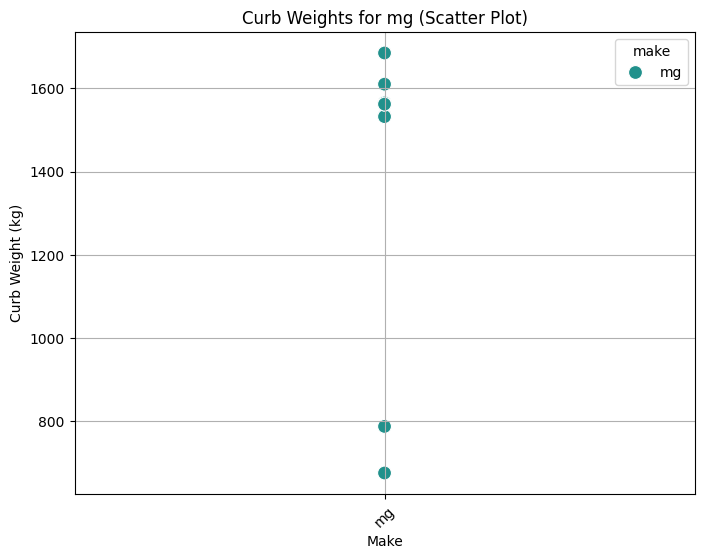

In [72]:
# Step 1: Filter the DataFrame for a specific make
specific_make = 'mg'
filtered_data = train_data[train_data['make'] == specific_make]

# Step 2: Visualize the curb weights for the specific make
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='make', y='curb_weight', hue='make', palette='viridis', s=100)
plt.title(f'Curb Weights for {specific_make} (Scatter Plot)')
plt.xlabel('Make')
plt.ylabel('Curb Weight (kg)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

Due to the variability in curb_weight
within each make, filling the missing curb_weight
values with the mean value of the make would not be an
accurate or reasonable approach. Therefore, we decided
against using the average curb_weight.

### Fuel Type

for fuel type column - i think older reg_year might be diesel, etc and newer reg_year might be more electric.

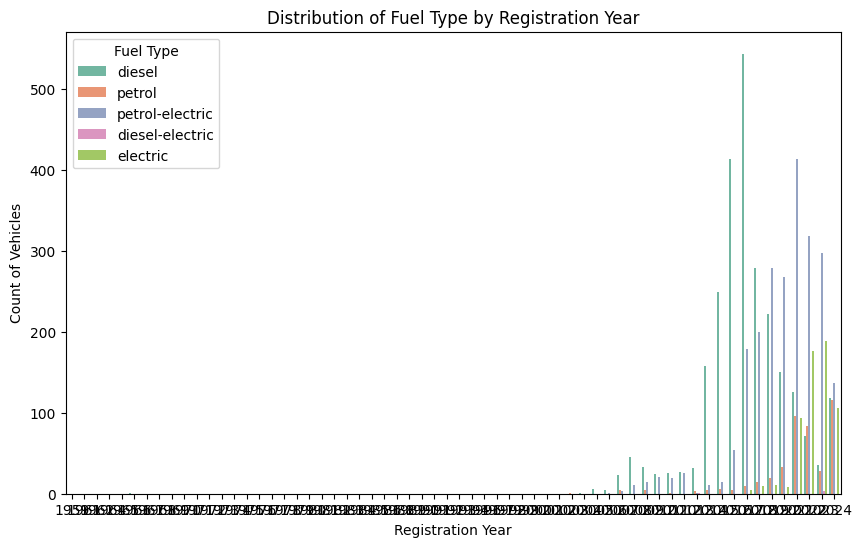

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='reg_year', hue='fuel_type', palette='Set2')
plt.title('Distribution of Fuel Type by Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Count of Vehicles')
plt.legend(title='Fuel Type')
plt.show()

In [74]:
earliest_years = train_data.nsmallest(5, 'reg_year')
earliest_years[["fuel_type", "reg_year", "transmission"]]

,fuel_type,reg_year,transmission
254,NaN,1959,manual
13010,NaN,1961,auto
15124,NaN,1962,auto
12302,NaN,1964,manual
1626,NaN,1965,auto


However, there was no trend
between years and fuel_type. Hence it was dropped.

lifespan has null for 22670 rows. but for the rows that values are there, shouldnt the predicted price automatically be 0? because after that date it has to be deregistered that means, we cant resell it.

### Lifespan

This column has null for 22670 rows. We initially hypoth-
esized that for cars that have exceeded their lifespan the price
should be 0, as the car would be deregistered and so it would
not be viable for reselling.
However, even cars that have exceed their lifespans have a
reselling price so this logic was not viable.

In [75]:
# Import datetime if not already imported
from datetime import datetime

# Define current date
current_date = datetime.now()

# Convert lifespan to datetime and create is_expired flag
train_data['lifespan'] = pd.to_datetime(train_data['lifespan'], errors='coerce')
train_data['is_expired'] = train_data['lifespan'].apply(lambda x: 1 if pd.notnull(x) and x < current_date else 0)

/var/folders/rh/l_ty2sb11m5bljbbs4kxnzfh0000gn/T/ipykernel_55804/3447972210.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['lifespan'] = pd.to_datetime(train_data['lifespan'], errors='coerce')


In [76]:
train_data[['lifespan','is_expired']]

,lifespan,is_expired
0,NaT,0
1,NaT,0
2,NaT,0
3,NaT,0
4,NaT,0
...,...,...
24995,NaT,0
24996,NaT,0
24997,NaT,0
24998,NaT,0


In [77]:
train_data[train_data['is_expired'] == 1]

,listing_id,title,make,model,description,manufactured,reg_date,type_of_vehicle,category,transmission,...,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_year,is_expired
3176,1198943,Toyota Liteace 2.2M (COE till 07/2024),toyota,liteace,workshop check/sta evaluation can be arranged....,2004.0,2004-07-23,van,"coe car, premium ad car, low mileage car",manual,...,935.0,NaN,2024-07-22,uncategorized,"5-door unit, diesel engine, manual gearbox.",reverse sensor and radio.,NaN,7300.0,2004,1
5482,1226888,Toyota Hiace Commuter 2.4M (COE till 08/2033),toyota,hiace,this van can drive in to malaysia is registere...,2003.0,2003-10-29,bus/mini bus,coe car,manual,...,31030.0,NaN,2023-10-28,uncategorized,NaN,NaN,NaN,158800.0,2003,1


why is there still a resale price for these? 
plus its only 2 rows so this is useless.

### Accessories, Features and Description

Although commonly repeated features, descriptions, and
accessories were identified and their correlation with price was
plotted, they did not exhibit particularly high correlations. We
also tried splitting by comma and counting how many items
are there in each and encode them with that value i.e. higher
number of features / accessories would result in higher prices
but that was also not the case.

#### Accessories

In [78]:
from collections import Counter
# Ensure 'accessories' is of string type
train_data['accessories'] = train_data['accessories'].astype(str)

# Split accessories by comma, then use explode to expand each accessory into a row
all_accessories = train_data['accessories'].str.split(',').explode()

# Clean up any extra spaces in accessory names
all_accessories = all_accessories.str.strip()

# Count the occurrences of each accessory
accessory_counts = dict(Counter(all_accessories))

pd.Series(accessory_counts).nlargest(6)

nan                    3813
leather seats          2756
reverse camera         2174
sports rims            2095
bluetooth              2058
keyless entry/start     935
dtype: int64

output - 
- nan                    3813
- leather seats          2756
- reverse camera         2174
- sports rims            2095
- bluetooth              2058
- keyless entry/start     935

so for this, i want to create new columns for them (except 'nan') like is_leather_seats, is_reverse_camera, etc. with value 1 if that record has that accessory.

In [79]:
# List of top accessories (excluding 'nan')
top_accessories = ['leather seats', 'reverse camera', 'sports rims', 'bluetooth', 'keyless entry/start']

# Iterate over the top accessories and create a new column for each
for accessory in top_accessories:
    train_data[f'is_{accessory.replace(" ", "_").replace("/", "_")}'] = train_data['accessories'].str.contains(accessory, case=False).astype(int)

# Check the modified DataFrame
print(train_data.head())

   listing_id                                              title  \
0     1292132  Land Rover Range Rover Velar 3.0A Si6 R-Dynami...   
1     1294696   Mercedes-Benz C-Class C200 Sport Premium Sunroof   
2     1311717              Honda Odyssey 2.4A (COE till 09/2027)   
3     1310068       Toyota Corolla Altis 1.6A (COE till 12/2028)   
4     1325280                     Lexus GS300 (COE till 06/2026)   

            make    model                                        description  \
0     land rover    range  1 owner, no repairs needed! it looks great, in...   
1  mercedes-benz     c200  rare beautiful white c200 sport premium sunroo...   
2          honda  odyssey            comes with warranty. full service done.   
3         toyota    altis                                                  0   
4          lexus       gs  wear and tear done up. well maintained and reg...   

   manufactured   reg_date  type_of_vehicle  \
0        2018.0 2018-03-08              suv   
1        2017.0 

#### Description

In [80]:
# Ensure 'description' is of string type
train_data['description'] = train_data['description'].astype(str)

# Split accessories by comma, then use explode to expand each accessory into a row
all_descriptions = train_data['description'].str.split(',').explode()

# Clean up any extra spaces in accessory names
all_descriptions = all_descriptions.str.strip()

# Count the occurrences of each accessory
description_counts = dict(Counter(all_descriptions))

pd.Series(description_counts).nlargest(10)

0                                                                                                       1497
1 owner                                                                                                  794
nan                                                                                                      680
drop by carro to view the largest fleet in singapore with 100% transparency on our vehicle condition     593
service add-ons and many more.                                                                           568
financing options                                                                                        476
accident free                                                                                            399
low mileage                                                                                              302
well maintained                                                                                          218
100% accident free 

In [81]:
# List of top description items (excluding 'nan')
top_descriptions = ['1 owner', 'drop by carro to view the largest fleet in singapore with 100% transparency on our vehicle condition', 'service add-ons and many more.', 'financing options', 'accident free']

# Iterate over the top description and create a new column for each
for description in top_descriptions:
    train_data[f'is_{description.replace(" ", "_").replace("/", "_")}'] = train_data['description'].str.contains(description, case=False).astype(int)

# Check the modified DataFrame
print(train_data.head())

   listing_id                                              title  \
0     1292132  Land Rover Range Rover Velar 3.0A Si6 R-Dynami...   
1     1294696   Mercedes-Benz C-Class C200 Sport Premium Sunroof   
2     1311717              Honda Odyssey 2.4A (COE till 09/2027)   
3     1310068       Toyota Corolla Altis 1.6A (COE till 12/2028)   
4     1325280                     Lexus GS300 (COE till 06/2026)   

            make    model                                        description  \
0     land rover    range  1 owner, no repairs needed! it looks great, in...   
1  mercedes-benz     c200  rare beautiful white c200 sport premium sunroo...   
2          honda  odyssey            comes with warranty. full service done.   
3         toyota    altis                                                  0   
4          lexus       gs  wear and tear done up. well maintained and reg...   

   manufactured   reg_date  type_of_vehicle  \
0        2018.0 2018-03-08              suv   
1        2017.0 

#### Features

In [82]:
# Ensure 'features' is of string type
train_data['features'] = train_data['features'].astype(str)

# Split features by comma, then use explode to expand each feature into a row
all_features = train_data['features'].str.split(',').explode()

# Clean up any extra spaces in feature names
all_features = all_features.str.strip()

# Count the occurrences of each feature
feature_counts = dict(Counter(all_features))

pd.Series(feature_counts).nlargest(6)

abs                 3879
cruise control      1974
airbags             1807
srs airbags         1001
nan                  843
traction control     653
dtype: int64

In [83]:
# List of top features (excluding 'nan')
top_features = ['abs', 'cruise control', 'airbags', 'srs airbags', 'traction control']

# Iterate over the top accessories and create a new column for each
for feature in top_features:
    train_data[f'is_{feature.replace(" ", "_").replace("/", "_")}'] = train_data['features'].str.contains(feature, case=False).astype(int)

instead of doing this for description, features, accessories. i will split by comma but count how many items are there in each and encode them with that value.

In [84]:
def count_items(column: pd.Series) -> pd.Series:
        return column.str.split(',').apply(lambda x: len([item for item in x if item.strip().lower() != 'nan']) if isinstance(x, list) else 0)

# Count accessories, excluding 'nan'
train_data['accessories_count'] = count_items(train_data['accessories'].astype(str))

    # Count features, excluding 'nan'
train_data['features_count'] = count_items(train_data['features'].astype(str))

    # Count descriptions, excluding 'nan'
train_data['description_count'] = count_items(train_data['description'].astype(str))

    # Drop original columns if needed
train_data.drop(columns=['accessories', 'features', 'description'], inplace=True, errors='ignore')

In [85]:
train_data

,listing_id,title,make,model,manufactured,reg_date,type_of_vehicle,category,transmission,curb_weight,...,is_financing_options,is_accident_free,is_abs,is_cruise_control,is_airbags,is_srs_airbags,is_traction_control,accessories_count,features_count,description_count
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,2018.0,2018-03-08,suv,parf car,auto,1884.0,...,0,0,0,1,0,0,0,8,6,3
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,2017.0,2017-12-28,luxury sedan,"parf car, premium ad car",auto,1465.0,...,0,0,1,1,1,1,0,4,8,2
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,2007.0,2007-09-19,mpv,"coe car, premium ad car, low mileage car",auto,1648.0,...,0,0,1,1,1,0,0,4,7,1
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,2008.0,2008-12-15,mid-sized sedan,"coe car, premium ad car",auto,1195.0,...,0,0,1,0,1,1,0,3,4,1
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,2006.0,2006-12-22,luxury sedan,"coe car, premium ad car",auto,1660.0,...,0,1,1,1,1,1,0,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,2011.0,2011-07-14,luxury sedan,"coe car, premium ad car, low mileage car",auto,1500.0,...,0,0,0,0,0,0,0,1,1,2
24996,1285898,Bentley Bentayga 4.0A V8,bentley,bentayga,2018.0,2020-04-29,suv,"parf car, direct owner sale, rare & exotic",auto,2470.0,...,0,0,0,0,0,0,0,10,3,5
24997,1306309,Mercedes-Benz A-Class A180,mercedes-benz,a180,2014.0,2015-04-01,hatchback,"parf car, premium ad car, low mileage car, sgc...",auto,1395.0,...,0,0,0,0,0,0,0,5,5,4
24998,1306902,Audi A3 Sportback 1.0A TFSI S-tronic,audi,a3,2017.0,2017-06-30,hatchback,parf car,auto,1275.0,...,0,1,1,0,1,1,0,7,7,1


### Outliers

In [86]:
train_data = pd.read_csv(train_data_file_path)
test_data = pd.read_csv(test_data_file_path)
train_output = process_data(train_data)

No. of duplicates: 1
Duplicates index: [18966]
Duplicates dropped, no. of rows:  24999


/var/folders/rh/l_ty2sb11m5bljbbs4kxnzfh0000gn/T/ipykernel_55804/781467128.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['reg_date'] = pd.to_datetime(data['reg_date'], errors='coerce')


In [87]:
# Specify the column to check for outliers
column_to_check = 'price'  # Replace with the column name

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the specific column
Q1 = train_output[column_to_check].quantile(0.25)
Q3 = train_output[column_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where the value in the specified column is an outlier
train_output_outliers_removed = train_output[(train_output[column_to_check] >= lower_bound) & (train_output[column_to_check] <= upper_bound)]

# Display the cleaned dataset shape
print("Shape of the original dataset:", train_output.shape)
print("Shape after removing outliers:", train_output_outliers_removed.shape)




Shape of the original dataset: (24999, 25)
Shape after removing outliers: (23217, 25)


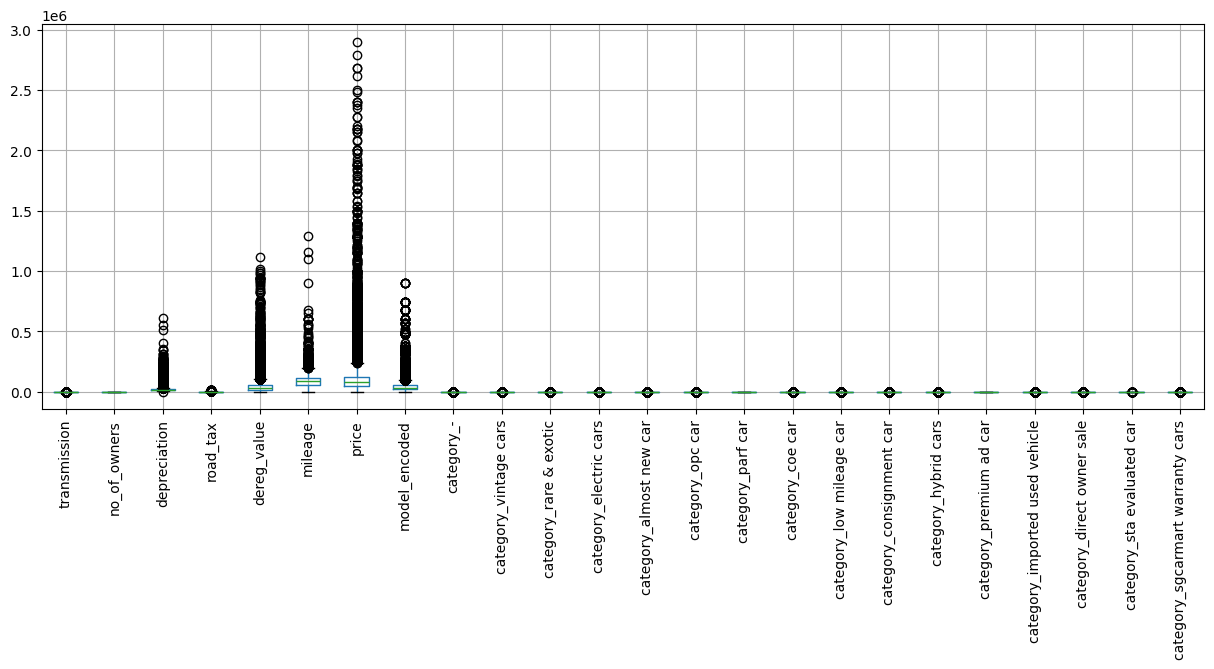

In [88]:
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
numerical_columns = train_output.select_dtypes(include=['float64', 'int64']).columns
train_output[numerical_columns].boxplot(figsize=(15, 5))
plt.xticks(rotation=90)
plt.show()
